In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 22.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 21.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 53.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.8 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [38]:

client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [39]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [47]:
count = 100 #number of returned tweets, default and max is 100  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [50]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

In [55]:

since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 01 20:32:22 +0000 2021'
'Mon Nov 01 20:32:21 +0000 2021'
'Mon Nov 01 20:32:20 +0000 2021'
'Mon Nov 01 20:32:20 +0000 2021'
'Mon Nov 01 20:32:20 +0000 2021'
'Mon Nov 01 20:32:19 +0000 2021'
'Mon Nov 01 20:32:19 +0000 2021'
'Mon Nov 01 20:32:17 +0000 2021'
'Mon Nov 01 20:32:17 +0000 2021'
'Mon Nov 01 20:32:16 +0000 2021'
'Mon Nov 01 20:32:16 +0000 2021'
'Mon Nov 01 20:32:16 +0000 2021'
'Mon Nov 01 20:32:15 +0000 2021'
'Mon Nov 01 20:32:15 +0000 2021'
'Mon Nov 01 20:32:15 +0000 2021'
'Mon Nov 01 20:32:15 +0000 2021'
'Mon Nov 01 20:32:14 +0000 2021'
'Mon Nov 01 20:32:14 +0000 2021'
'Mon Nov 01 20:32:13 +0000 2021'
'Mon Nov 01 20:32:13 +0000 2021'
'Mon Nov 01 20:32:13 +0000 2021'
'Mon Nov 01 20:32:13 +0000 2021'
'Mon Nov 01 20:32:12 +0000 2021'
'Mon Nov 01 20:32:09 +0000 2021'
'Mon Nov 01 20:32:08 +0000 2021'
'Mon Nov 01 20:32:04 +0000 2021'
'Mon Nov 01 20:32:03 +0000 2021'
'Mon Nov 01 20:32:01 +0000 2021'
'Mon Nov 01 20:32:01 +0000 2021'
'Mon Nov 01 20:32:01 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:30:00 +0000 2021'
'Mon Nov 01 20:30:00 +0000 2021'
'Mon Nov 01 20:30:00 +0000 2021'
'Mon Nov 01 20:30:00 +0000 2021'
'Mon Nov 01 20:29:59 +0000 2021'
'Mon Nov 01 20:29:59 +0000 2021'
'Mon Nov 01 20:29:59 +0000 2021'
'Mon Nov 01 20:29:59 +0000 2021'
'Mon Nov 01 20:29:58 +0000 2021'
'Mon Nov 01 20:29:58 +0000 2021'
'Mon Nov 01 20:29:57 +0000 2021'
'Mon Nov 01 20:29:57 +0000 2021'
'Mon Nov 01 20:29:57 +0000 2021'
'Mon Nov 01 20:29:56 +0000 2021'
'Mon Nov 01 20:29:56 +0000 2021'
'Mon Nov 01 20:29:55 +0000 2021'
'Mon Nov 01 20:29:53 +0000 2021'
'Mon Nov 01 20:29:51 +0000 2021'
'Mon Nov 01 20:29:50 +0000 2021'
'Mon Nov 01 20:29:50 +0000 2021'
'Mon Nov 01 20:29:49 +0000 2021'
'Mon Nov 01 20:29:47 +0000 2021'
'Mon Nov 01 20:29:46 +0000 2021'
'Mon Nov 01 20:29:45 +0000 2021'
'Mon Nov 01 20:29:45 +0000 2021'
'Mon Nov 01 20:29:44 +0000 2021'
'Mon Nov 01 20:29:42 +0000 2021'
'Mon Nov 01 20:29:42 +0000 2021'
'Mon Nov 01 20:29:41 +0000 2021'
'Mon Nov 01 20:29:40 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:27:21 +0000 2021'
'Mon Nov 01 20:27:21 +0000 2021'
'Mon Nov 01 20:27:20 +0000 2021'
'Mon Nov 01 20:27:20 +0000 2021'
'Mon Nov 01 20:27:20 +0000 2021'
'Mon Nov 01 20:27:19 +0000 2021'
'Mon Nov 01 20:27:19 +0000 2021'
'Mon Nov 01 20:27:19 +0000 2021'
'Mon Nov 01 20:27:18 +0000 2021'
'Mon Nov 01 20:27:18 +0000 2021'
'Mon Nov 01 20:27:18 +0000 2021'
'Mon Nov 01 20:27:17 +0000 2021'
'Mon Nov 01 20:27:15 +0000 2021'
'Mon Nov 01 20:27:15 +0000 2021'
'Mon Nov 01 20:27:14 +0000 2021'
'Mon Nov 01 20:27:14 +0000 2021'
'Mon Nov 01 20:27:14 +0000 2021'
'Mon Nov 01 20:27:13 +0000 2021'
'Mon Nov 01 20:27:13 +0000 2021'
'Mon Nov 01 20:27:13 +0000 2021'
'Mon Nov 01 20:27:12 +0000 2021'
'Mon Nov 01 20:27:12 +0000 2021'
'Mon Nov 01 20:27:11 +0000 2021'
'Mon Nov 01 20:27:10 +0000 2021'
'Mon Nov 01 20:27:09 +0000 2021'
'Mon Nov 01 20:27:09 +0000 2021'
'Mon Nov 01 20:27:09 +0000 2021'
'Mon Nov 01 20:27:09 +0000 2021'
'Mon Nov 01 20:27:07 +0000 2021'
'Mon Nov 01 20:27:06 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:24:50 +0000 2021'
'Mon Nov 01 20:24:50 +0000 2021'
'Mon Nov 01 20:24:49 +0000 2021'
'Mon Nov 01 20:24:47 +0000 2021'
'Mon Nov 01 20:24:47 +0000 2021'
'Mon Nov 01 20:24:47 +0000 2021'
'Mon Nov 01 20:24:46 +0000 2021'
'Mon Nov 01 20:24:46 +0000 2021'
'Mon Nov 01 20:24:45 +0000 2021'
'Mon Nov 01 20:24:44 +0000 2021'
'Mon Nov 01 20:24:44 +0000 2021'
'Mon Nov 01 20:24:44 +0000 2021'
'Mon Nov 01 20:24:43 +0000 2021'
'Mon Nov 01 20:24:42 +0000 2021'
'Mon Nov 01 20:24:42 +0000 2021'
'Mon Nov 01 20:24:41 +0000 2021'
'Mon Nov 01 20:24:40 +0000 2021'
'Mon Nov 01 20:24:39 +0000 2021'
'Mon Nov 01 20:24:39 +0000 2021'
'Mon Nov 01 20:24:39 +0000 2021'
'Mon Nov 01 20:24:37 +0000 2021'
'Mon Nov 01 20:24:37 +0000 2021'
'Mon Nov 01 20:24:36 +0000 2021'
'Mon Nov 01 20:24:35 +0000 2021'
'Mon Nov 01 20:24:35 +0000 2021'
'Mon Nov 01 20:24:33 +0000 2021'
'Mon Nov 01 20:24:32 +0000 2021'
'Mon Nov 01 20:24:31 +0000 2021'
'Mon Nov 01 20:24:30 +0000 2021'
'Mon Nov 01 20:24:30 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:22:09 +0000 2021'
'Mon Nov 01 20:22:09 +0000 2021'
'Mon Nov 01 20:22:09 +0000 2021'
'Mon Nov 01 20:22:08 +0000 2021'
'Mon Nov 01 20:22:08 +0000 2021'
'Mon Nov 01 20:22:08 +0000 2021'
'Mon Nov 01 20:22:07 +0000 2021'
'Mon Nov 01 20:22:07 +0000 2021'
'Mon Nov 01 20:22:06 +0000 2021'
'Mon Nov 01 20:22:05 +0000 2021'
'Mon Nov 01 20:22:05 +0000 2021'
'Mon Nov 01 20:22:05 +0000 2021'
'Mon Nov 01 20:22:04 +0000 2021'
'Mon Nov 01 20:22:04 +0000 2021'
'Mon Nov 01 20:22:02 +0000 2021'
'Mon Nov 01 20:22:02 +0000 2021'
'Mon Nov 01 20:22:00 +0000 2021'
'Mon Nov 01 20:22:00 +0000 2021'
'Mon Nov 01 20:21:59 +0000 2021'
'Mon Nov 01 20:21:58 +0000 2021'
'Mon Nov 01 20:21:57 +0000 2021'
'Mon Nov 01 20:21:57 +0000 2021'
'Mon Nov 01 20:21:56 +0000 2021'
'Mon Nov 01 20:21:54 +0000 2021'
'Mon Nov 01 20:21:54 +0000 2021'
'Mon Nov 01 20:21:54 +0000 2021'
'Mon Nov 01 20:21:54 +0000 2021'
'Mon Nov 01 20:21:52 +0000 2021'
'Mon Nov 01 20:21:52 +0000 2021'
'Mon Nov 01 20:21:52 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:19:49 +0000 2021'
'Mon Nov 01 20:19:48 +0000 2021'
'Mon Nov 01 20:19:48 +0000 2021'
'Mon Nov 01 20:19:47 +0000 2021'
'Mon Nov 01 20:19:46 +0000 2021'
'Mon Nov 01 20:19:46 +0000 2021'
'Mon Nov 01 20:19:46 +0000 2021'
'Mon Nov 01 20:19:45 +0000 2021'
'Mon Nov 01 20:19:45 +0000 2021'
'Mon Nov 01 20:19:44 +0000 2021'
'Mon Nov 01 20:19:44 +0000 2021'
'Mon Nov 01 20:19:42 +0000 2021'
'Mon Nov 01 20:19:40 +0000 2021'
'Mon Nov 01 20:19:40 +0000 2021'
'Mon Nov 01 20:19:39 +0000 2021'
'Mon Nov 01 20:19:37 +0000 2021'
'Mon Nov 01 20:19:34 +0000 2021'
'Mon Nov 01 20:19:34 +0000 2021'
'Mon Nov 01 20:19:34 +0000 2021'
'Mon Nov 01 20:19:33 +0000 2021'
'Mon Nov 01 20:19:33 +0000 2021'
'Mon Nov 01 20:19:32 +0000 2021'
'Mon Nov 01 20:19:32 +0000 2021'
'Mon Nov 01 20:19:31 +0000 2021'
'Mon Nov 01 20:19:31 +0000 2021'
'Mon Nov 01 20:19:30 +0000 2021'
'Mon Nov 01 20:19:30 +0000 2021'
'Mon Nov 01 20:19:30 +0000 2021'
'Mon Nov 01 20:19:30 +0000 2021'
'Mon Nov 01 20:19:30 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:17:17 +0000 2021'
'Mon Nov 01 20:17:16 +0000 2021'
'Mon Nov 01 20:17:16 +0000 2021'
'Mon Nov 01 20:17:16 +0000 2021'
'Mon Nov 01 20:17:15 +0000 2021'
'Mon Nov 01 20:17:15 +0000 2021'
'Mon Nov 01 20:17:14 +0000 2021'
'Mon Nov 01 20:17:13 +0000 2021'
'Mon Nov 01 20:17:12 +0000 2021'
'Mon Nov 01 20:17:12 +0000 2021'
'Mon Nov 01 20:17:12 +0000 2021'
'Mon Nov 01 20:17:12 +0000 2021'
'Mon Nov 01 20:17:12 +0000 2021'
'Mon Nov 01 20:17:11 +0000 2021'
'Mon Nov 01 20:17:09 +0000 2021'
'Mon Nov 01 20:17:09 +0000 2021'
'Mon Nov 01 20:17:09 +0000 2021'
'Mon Nov 01 20:17:09 +0000 2021'
'Mon Nov 01 20:17:08 +0000 2021'
'Mon Nov 01 20:17:08 +0000 2021'
'Mon Nov 01 20:17:08 +0000 2021'
'Mon Nov 01 20:17:07 +0000 2021'
'Mon Nov 01 20:17:07 +0000 2021'
'Mon Nov 01 20:17:06 +0000 2021'
'Mon Nov 01 20:17:05 +0000 2021'
'Mon Nov 01 20:17:04 +0000 2021'
'Mon Nov 01 20:17:04 +0000 2021'
'Mon Nov 01 20:17:04 +0000 2021'
'Mon Nov 01 20:17:03 +0000 2021'
'Mon Nov 01 20:17:03 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:14:56 +0000 2021'
'Mon Nov 01 20:14:55 +0000 2021'
'Mon Nov 01 20:14:54 +0000 2021'
'Mon Nov 01 20:14:54 +0000 2021'
'Mon Nov 01 20:14:54 +0000 2021'
'Mon Nov 01 20:14:52 +0000 2021'
'Mon Nov 01 20:14:52 +0000 2021'
'Mon Nov 01 20:14:51 +0000 2021'
'Mon Nov 01 20:14:51 +0000 2021'
'Mon Nov 01 20:14:50 +0000 2021'
'Mon Nov 01 20:14:50 +0000 2021'
'Mon Nov 01 20:14:49 +0000 2021'
'Mon Nov 01 20:14:49 +0000 2021'
'Mon Nov 01 20:14:49 +0000 2021'
'Mon Nov 01 20:14:48 +0000 2021'
'Mon Nov 01 20:14:48 +0000 2021'
'Mon Nov 01 20:14:46 +0000 2021'
'Mon Nov 01 20:14:43 +0000 2021'
'Mon Nov 01 20:14:43 +0000 2021'
'Mon Nov 01 20:14:42 +0000 2021'
'Mon Nov 01 20:14:42 +0000 2021'
'Mon Nov 01 20:14:41 +0000 2021'
'Mon Nov 01 20:14:41 +0000 2021'
'Mon Nov 01 20:14:41 +0000 2021'
'Mon Nov 01 20:14:39 +0000 2021'
'Mon Nov 01 20:14:39 +0000 2021'
'Mon Nov 01 20:14:39 +0000 2021'
'Mon Nov 01 20:14:39 +0000 2021'
'Mon Nov 01 20:14:38 +0000 2021'
'Mon Nov 01 20:14:37 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:12:20 +0000 2021'
'Mon Nov 01 20:12:20 +0000 2021'
'Mon Nov 01 20:12:19 +0000 2021'
'Mon Nov 01 20:12:19 +0000 2021'
'Mon Nov 01 20:12:19 +0000 2021'
'Mon Nov 01 20:12:19 +0000 2021'
'Mon Nov 01 20:12:18 +0000 2021'
'Mon Nov 01 20:12:18 +0000 2021'
'Mon Nov 01 20:12:18 +0000 2021'
'Mon Nov 01 20:12:16 +0000 2021'
'Mon Nov 01 20:12:15 +0000 2021'
'Mon Nov 01 20:12:15 +0000 2021'
'Mon Nov 01 20:12:14 +0000 2021'
'Mon Nov 01 20:12:14 +0000 2021'
'Mon Nov 01 20:12:13 +0000 2021'
'Mon Nov 01 20:12:12 +0000 2021'
'Mon Nov 01 20:12:12 +0000 2021'
'Mon Nov 01 20:12:12 +0000 2021'
'Mon Nov 01 20:12:11 +0000 2021'
'Mon Nov 01 20:12:11 +0000 2021'
'Mon Nov 01 20:12:11 +0000 2021'
'Mon Nov 01 20:12:09 +0000 2021'
'Mon Nov 01 20:12:09 +0000 2021'
'Mon Nov 01 20:12:08 +0000 2021'
'Mon Nov 01 20:12:08 +0000 2021'
'Mon Nov 01 20:12:07 +0000 2021'
'Mon Nov 01 20:12:07 +0000 2021'
'Mon Nov 01 20:12:07 +0000 2021'
'Mon Nov 01 20:12:07 +0000 2021'
'Mon Nov 01 20:12:06 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:09:37 +0000 2021'
'Mon Nov 01 20:09:36 +0000 2021'
'Mon Nov 01 20:09:36 +0000 2021'
'Mon Nov 01 20:09:36 +0000 2021'
'Mon Nov 01 20:09:35 +0000 2021'
'Mon Nov 01 20:09:35 +0000 2021'
'Mon Nov 01 20:09:34 +0000 2021'
'Mon Nov 01 20:09:34 +0000 2021'
'Mon Nov 01 20:09:33 +0000 2021'
'Mon Nov 01 20:09:33 +0000 2021'
'Mon Nov 01 20:09:33 +0000 2021'
'Mon Nov 01 20:09:32 +0000 2021'
'Mon Nov 01 20:09:32 +0000 2021'
'Mon Nov 01 20:09:32 +0000 2021'
'Mon Nov 01 20:09:31 +0000 2021'
'Mon Nov 01 20:09:31 +0000 2021'
'Mon Nov 01 20:09:30 +0000 2021'
'Mon Nov 01 20:09:29 +0000 2021'
'Mon Nov 01 20:09:23 +0000 2021'
'Mon Nov 01 20:09:23 +0000 2021'
'Mon Nov 01 20:09:22 +0000 2021'
'Mon Nov 01 20:09:22 +0000 2021'
'Mon Nov 01 20:09:21 +0000 2021'
'Mon Nov 01 20:09:21 +0000 2021'
'Mon Nov 01 20:09:20 +0000 2021'
'Mon Nov 01 20:09:20 +0000 2021'
'Mon Nov 01 20:09:19 +0000 2021'
'Mon Nov 01 20:09:19 +0000 2021'
'Mon Nov 01 20:09:18 +0000 2021'
'Mon Nov 01 20:09:18 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:06:49 +0000 2021'
'Mon Nov 01 20:06:48 +0000 2021'
'Mon Nov 01 20:06:47 +0000 2021'
'Mon Nov 01 20:06:45 +0000 2021'
'Mon Nov 01 20:06:45 +0000 2021'
'Mon Nov 01 20:06:45 +0000 2021'
'Mon Nov 01 20:06:45 +0000 2021'
'Mon Nov 01 20:06:43 +0000 2021'
'Mon Nov 01 20:06:42 +0000 2021'
'Mon Nov 01 20:06:42 +0000 2021'
'Mon Nov 01 20:06:40 +0000 2021'
'Mon Nov 01 20:06:39 +0000 2021'
'Mon Nov 01 20:06:39 +0000 2021'
'Mon Nov 01 20:06:39 +0000 2021'
'Mon Nov 01 20:06:39 +0000 2021'
'Mon Nov 01 20:06:38 +0000 2021'
'Mon Nov 01 20:06:38 +0000 2021'
'Mon Nov 01 20:06:36 +0000 2021'
'Mon Nov 01 20:06:36 +0000 2021'
'Mon Nov 01 20:06:36 +0000 2021'
'Mon Nov 01 20:06:34 +0000 2021'
'Mon Nov 01 20:06:34 +0000 2021'
'Mon Nov 01 20:06:34 +0000 2021'
'Mon Nov 01 20:06:33 +0000 2021'
'Mon Nov 01 20:06:32 +0000 2021'
'Mon Nov 01 20:06:31 +0000 2021'
'Mon Nov 01 20:06:31 +0000 2021'
'Mon Nov 01 20:06:31 +0000 2021'
'Mon Nov 01 20:06:31 +0000 2021'
'Mon Nov 01 20:06:29 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:04:17 +0000 2021'
'Mon Nov 01 20:04:15 +0000 2021'
'Mon Nov 01 20:04:15 +0000 2021'
'Mon Nov 01 20:04:14 +0000 2021'
'Mon Nov 01 20:04:14 +0000 2021'
'Mon Nov 01 20:04:13 +0000 2021'
'Mon Nov 01 20:04:13 +0000 2021'
'Mon Nov 01 20:04:13 +0000 2021'
'Mon Nov 01 20:04:13 +0000 2021'
'Mon Nov 01 20:04:12 +0000 2021'
'Mon Nov 01 20:04:12 +0000 2021'
'Mon Nov 01 20:04:11 +0000 2021'
'Mon Nov 01 20:04:11 +0000 2021'
'Mon Nov 01 20:04:10 +0000 2021'
'Mon Nov 01 20:04:10 +0000 2021'
'Mon Nov 01 20:04:10 +0000 2021'
'Mon Nov 01 20:04:10 +0000 2021'
'Mon Nov 01 20:04:10 +0000 2021'
'Mon Nov 01 20:04:10 +0000 2021'
'Mon Nov 01 20:04:08 +0000 2021'
'Mon Nov 01 20:04:07 +0000 2021'
'Mon Nov 01 20:04:07 +0000 2021'
'Mon Nov 01 20:04:06 +0000 2021'
'Mon Nov 01 20:04:06 +0000 2021'
'Mon Nov 01 20:04:06 +0000 2021'
'Mon Nov 01 20:04:05 +0000 2021'
'Mon Nov 01 20:04:05 +0000 2021'
'Mon Nov 01 20:04:05 +0000 2021'
'Mon Nov 01 20:04:04 +0000 2021'
'Mon Nov 01 20:04:04 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:02:03 +0000 2021'
'Mon Nov 01 20:02:03 +0000 2021'
'Mon Nov 01 20:02:03 +0000 2021'
'Mon Nov 01 20:02:03 +0000 2021'
'Mon Nov 01 20:02:02 +0000 2021'
'Mon Nov 01 20:02:02 +0000 2021'
'Mon Nov 01 20:02:01 +0000 2021'
'Mon Nov 01 20:02:01 +0000 2021'
'Mon Nov 01 20:02:01 +0000 2021'
'Mon Nov 01 20:02:00 +0000 2021'
'Mon Nov 01 20:02:00 +0000 2021'
'Mon Nov 01 20:02:00 +0000 2021'
'Mon Nov 01 20:01:58 +0000 2021'
'Mon Nov 01 20:01:58 +0000 2021'
'Mon Nov 01 20:01:58 +0000 2021'
'Mon Nov 01 20:01:57 +0000 2021'
'Mon Nov 01 20:01:57 +0000 2021'
'Mon Nov 01 20:01:57 +0000 2021'
'Mon Nov 01 20:01:56 +0000 2021'
'Mon Nov 01 20:01:55 +0000 2021'
'Mon Nov 01 20:01:54 +0000 2021'
'Mon Nov 01 20:01:54 +0000 2021'
'Mon Nov 01 20:01:53 +0000 2021'
'Mon Nov 01 20:01:53 +0000 2021'
'Mon Nov 01 20:01:52 +0000 2021'
'Mon Nov 01 20:01:52 +0000 2021'
'Mon Nov 01 20:01:51 +0000 2021'
'Mon Nov 01 20:01:51 +0000 2021'
'Mon Nov 01 20:01:49 +0000 2021'
'Mon Nov 01 20:01:49 +0000 2021'
'Mon Nov 0

'Mon Nov 01 20:00:09 +0000 2021'
'Mon Nov 01 20:00:07 +0000 2021'
'Mon Nov 01 20:00:07 +0000 2021'
'Mon Nov 01 20:00:07 +0000 2021'
'Mon Nov 01 20:00:07 +0000 2021'
'Mon Nov 01 20:00:07 +0000 2021'
'Mon Nov 01 20:00:07 +0000 2021'
'Mon Nov 01 20:00:06 +0000 2021'
'Mon Nov 01 20:00:05 +0000 2021'
'Mon Nov 01 20:00:05 +0000 2021'
'Mon Nov 01 20:00:05 +0000 2021'
'Mon Nov 01 20:00:05 +0000 2021'
'Mon Nov 01 20:00:04 +0000 2021'
'Mon Nov 01 20:00:04 +0000 2021'
'Mon Nov 01 20:00:03 +0000 2021'
'Mon Nov 01 20:00:03 +0000 2021'
'Mon Nov 01 20:00:03 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:02 +0000 2021'
'Mon Nov 01 20:00:01 +0000 2021'
'Mon Nov 01 20:00:01 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:57:29 +0000 2021'
'Mon Nov 01 19:57:27 +0000 2021'
'Mon Nov 01 19:57:27 +0000 2021'
'Mon Nov 01 19:57:27 +0000 2021'
'Mon Nov 01 19:57:26 +0000 2021'
'Mon Nov 01 19:57:26 +0000 2021'
'Mon Nov 01 19:57:25 +0000 2021'
'Mon Nov 01 19:57:25 +0000 2021'
'Mon Nov 01 19:57:25 +0000 2021'
'Mon Nov 01 19:57:24 +0000 2021'
'Mon Nov 01 19:57:24 +0000 2021'
'Mon Nov 01 19:57:23 +0000 2021'
'Mon Nov 01 19:57:22 +0000 2021'
'Mon Nov 01 19:57:22 +0000 2021'
'Mon Nov 01 19:57:21 +0000 2021'
'Mon Nov 01 19:57:19 +0000 2021'
'Mon Nov 01 19:57:19 +0000 2021'
'Mon Nov 01 19:57:18 +0000 2021'
'Mon Nov 01 19:57:18 +0000 2021'
'Mon Nov 01 19:57:17 +0000 2021'
'Mon Nov 01 19:57:16 +0000 2021'
'Mon Nov 01 19:57:16 +0000 2021'
'Mon Nov 01 19:57:16 +0000 2021'
'Mon Nov 01 19:57:16 +0000 2021'
'Mon Nov 01 19:57:15 +0000 2021'
'Mon Nov 01 19:57:14 +0000 2021'
'Mon Nov 01 19:57:14 +0000 2021'
'Mon Nov 01 19:57:14 +0000 2021'
'Mon Nov 01 19:57:13 +0000 2021'
'Mon Nov 01 19:57:13 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:55:01 +0000 2021'
'Mon Nov 01 19:55:01 +0000 2021'
'Mon Nov 01 19:55:01 +0000 2021'
'Mon Nov 01 19:55:00 +0000 2021'
'Mon Nov 01 19:54:59 +0000 2021'
'Mon Nov 01 19:54:58 +0000 2021'
'Mon Nov 01 19:54:58 +0000 2021'
'Mon Nov 01 19:54:57 +0000 2021'
'Mon Nov 01 19:54:57 +0000 2021'
'Mon Nov 01 19:54:56 +0000 2021'
'Mon Nov 01 19:54:55 +0000 2021'
'Mon Nov 01 19:54:55 +0000 2021'
'Mon Nov 01 19:54:52 +0000 2021'
'Mon Nov 01 19:54:49 +0000 2021'
'Mon Nov 01 19:54:47 +0000 2021'
'Mon Nov 01 19:54:46 +0000 2021'
'Mon Nov 01 19:54:46 +0000 2021'
'Mon Nov 01 19:54:45 +0000 2021'
'Mon Nov 01 19:54:45 +0000 2021'
'Mon Nov 01 19:54:44 +0000 2021'
'Mon Nov 01 19:54:41 +0000 2021'
'Mon Nov 01 19:54:40 +0000 2021'
'Mon Nov 01 19:54:38 +0000 2021'
'Mon Nov 01 19:54:38 +0000 2021'
'Mon Nov 01 19:54:38 +0000 2021'
'Mon Nov 01 19:54:37 +0000 2021'
'Mon Nov 01 19:54:37 +0000 2021'
'Mon Nov 01 19:54:37 +0000 2021'
'Mon Nov 01 19:54:35 +0000 2021'
'Mon Nov 01 19:54:34 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:52:19 +0000 2021'
'Mon Nov 01 19:52:18 +0000 2021'
'Mon Nov 01 19:52:18 +0000 2021'
'Mon Nov 01 19:52:18 +0000 2021'
'Mon Nov 01 19:52:17 +0000 2021'
'Mon Nov 01 19:52:17 +0000 2021'
'Mon Nov 01 19:52:16 +0000 2021'
'Mon Nov 01 19:52:14 +0000 2021'
'Mon Nov 01 19:52:14 +0000 2021'
'Mon Nov 01 19:52:14 +0000 2021'
'Mon Nov 01 19:52:13 +0000 2021'
'Mon Nov 01 19:52:13 +0000 2021'
'Mon Nov 01 19:52:13 +0000 2021'
'Mon Nov 01 19:52:13 +0000 2021'
'Mon Nov 01 19:52:13 +0000 2021'
'Mon Nov 01 19:52:12 +0000 2021'
'Mon Nov 01 19:52:12 +0000 2021'
'Mon Nov 01 19:52:12 +0000 2021'
'Mon Nov 01 19:52:12 +0000 2021'
'Mon Nov 01 19:52:11 +0000 2021'
'Mon Nov 01 19:52:10 +0000 2021'
'Mon Nov 01 19:52:09 +0000 2021'
'Mon Nov 01 19:52:09 +0000 2021'
'Mon Nov 01 19:52:09 +0000 2021'
'Mon Nov 01 19:52:08 +0000 2021'
'Mon Nov 01 19:52:08 +0000 2021'
'Mon Nov 01 19:52:06 +0000 2021'
'Mon Nov 01 19:52:05 +0000 2021'
'Mon Nov 01 19:52:03 +0000 2021'
'Mon Nov 01 19:52:03 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:49:42 +0000 2021'
'Mon Nov 01 19:49:41 +0000 2021'
'Mon Nov 01 19:49:41 +0000 2021'
'Mon Nov 01 19:49:40 +0000 2021'
'Mon Nov 01 19:49:39 +0000 2021'
'Mon Nov 01 19:49:38 +0000 2021'
'Mon Nov 01 19:49:38 +0000 2021'
'Mon Nov 01 19:49:38 +0000 2021'
'Mon Nov 01 19:49:37 +0000 2021'
'Mon Nov 01 19:49:36 +0000 2021'
'Mon Nov 01 19:49:36 +0000 2021'
'Mon Nov 01 19:49:36 +0000 2021'
'Mon Nov 01 19:49:34 +0000 2021'
'Mon Nov 01 19:49:33 +0000 2021'
'Mon Nov 01 19:49:32 +0000 2021'
'Mon Nov 01 19:49:32 +0000 2021'
'Mon Nov 01 19:49:32 +0000 2021'
'Mon Nov 01 19:49:31 +0000 2021'
'Mon Nov 01 19:49:31 +0000 2021'
'Mon Nov 01 19:49:30 +0000 2021'
'Mon Nov 01 19:49:30 +0000 2021'
'Mon Nov 01 19:49:29 +0000 2021'
'Mon Nov 01 19:49:29 +0000 2021'
'Mon Nov 01 19:49:29 +0000 2021'
'Mon Nov 01 19:49:28 +0000 2021'
'Mon Nov 01 19:49:28 +0000 2021'
'Mon Nov 01 19:49:26 +0000 2021'
'Mon Nov 01 19:49:26 +0000 2021'
'Mon Nov 01 19:49:26 +0000 2021'
'Mon Nov 01 19:49:26 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:47:04 +0000 2021'
'Mon Nov 01 19:47:03 +0000 2021'
'Mon Nov 01 19:47:03 +0000 2021'
'Mon Nov 01 19:47:01 +0000 2021'
'Mon Nov 01 19:47:00 +0000 2021'
'Mon Nov 01 19:47:00 +0000 2021'
'Mon Nov 01 19:47:00 +0000 2021'
'Mon Nov 01 19:47:00 +0000 2021'
'Mon Nov 01 19:46:59 +0000 2021'
'Mon Nov 01 19:46:58 +0000 2021'
'Mon Nov 01 19:46:58 +0000 2021'
'Mon Nov 01 19:46:58 +0000 2021'
'Mon Nov 01 19:46:58 +0000 2021'
'Mon Nov 01 19:46:58 +0000 2021'
'Mon Nov 01 19:46:57 +0000 2021'
'Mon Nov 01 19:46:53 +0000 2021'
'Mon Nov 01 19:46:53 +0000 2021'
'Mon Nov 01 19:46:51 +0000 2021'
'Mon Nov 01 19:46:50 +0000 2021'
'Mon Nov 01 19:46:49 +0000 2021'
'Mon Nov 01 19:46:48 +0000 2021'
'Mon Nov 01 19:46:47 +0000 2021'
'Mon Nov 01 19:46:47 +0000 2021'
'Mon Nov 01 19:46:47 +0000 2021'
'Mon Nov 01 19:46:45 +0000 2021'
'Mon Nov 01 19:46:44 +0000 2021'
'Mon Nov 01 19:46:44 +0000 2021'
'Mon Nov 01 19:46:44 +0000 2021'
'Mon Nov 01 19:46:43 +0000 2021'
'Mon Nov 01 19:46:43 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:44:31 +0000 2021'
'Mon Nov 01 19:44:29 +0000 2021'
'Mon Nov 01 19:44:26 +0000 2021'
'Mon Nov 01 19:44:24 +0000 2021'
'Mon Nov 01 19:44:24 +0000 2021'
'Mon Nov 01 19:44:23 +0000 2021'
'Mon Nov 01 19:44:22 +0000 2021'
'Mon Nov 01 19:44:22 +0000 2021'
'Mon Nov 01 19:44:22 +0000 2021'
'Mon Nov 01 19:44:22 +0000 2021'
'Mon Nov 01 19:44:22 +0000 2021'
'Mon Nov 01 19:44:21 +0000 2021'
'Mon Nov 01 19:44:21 +0000 2021'
'Mon Nov 01 19:44:20 +0000 2021'
'Mon Nov 01 19:44:20 +0000 2021'
'Mon Nov 01 19:44:19 +0000 2021'
'Mon Nov 01 19:44:19 +0000 2021'
'Mon Nov 01 19:44:19 +0000 2021'
'Mon Nov 01 19:44:17 +0000 2021'
'Mon Nov 01 19:44:17 +0000 2021'
'Mon Nov 01 19:44:16 +0000 2021'
'Mon Nov 01 19:44:16 +0000 2021'
'Mon Nov 01 19:44:16 +0000 2021'
'Mon Nov 01 19:44:16 +0000 2021'
'Mon Nov 01 19:44:14 +0000 2021'
'Mon Nov 01 19:44:14 +0000 2021'
'Mon Nov 01 19:44:13 +0000 2021'
'Mon Nov 01 19:44:12 +0000 2021'
'Mon Nov 01 19:44:11 +0000 2021'
'Mon Nov 01 19:44:10 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:41:45 +0000 2021'
'Mon Nov 01 19:41:45 +0000 2021'
'Mon Nov 01 19:41:44 +0000 2021'
'Mon Nov 01 19:41:43 +0000 2021'
'Mon Nov 01 19:41:43 +0000 2021'
'Mon Nov 01 19:41:43 +0000 2021'
'Mon Nov 01 19:41:42 +0000 2021'
'Mon Nov 01 19:41:41 +0000 2021'
'Mon Nov 01 19:41:40 +0000 2021'
'Mon Nov 01 19:41:40 +0000 2021'
'Mon Nov 01 19:41:40 +0000 2021'
'Mon Nov 01 19:41:39 +0000 2021'
'Mon Nov 01 19:41:38 +0000 2021'
'Mon Nov 01 19:41:38 +0000 2021'
'Mon Nov 01 19:41:36 +0000 2021'
'Mon Nov 01 19:41:35 +0000 2021'
'Mon Nov 01 19:41:34 +0000 2021'
'Mon Nov 01 19:41:33 +0000 2021'
'Mon Nov 01 19:41:33 +0000 2021'
'Mon Nov 01 19:41:33 +0000 2021'
'Mon Nov 01 19:41:32 +0000 2021'
'Mon Nov 01 19:41:31 +0000 2021'
'Mon Nov 01 19:41:31 +0000 2021'
'Mon Nov 01 19:41:31 +0000 2021'
'Mon Nov 01 19:41:30 +0000 2021'
'Mon Nov 01 19:41:29 +0000 2021'
'Mon Nov 01 19:41:27 +0000 2021'
'Mon Nov 01 19:41:26 +0000 2021'
'Mon Nov 01 19:41:26 +0000 2021'
'Mon Nov 01 19:41:24 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:39:23 +0000 2021'
'Mon Nov 01 19:39:23 +0000 2021'
'Mon Nov 01 19:39:23 +0000 2021'
'Mon Nov 01 19:39:23 +0000 2021'
'Mon Nov 01 19:39:22 +0000 2021'
'Mon Nov 01 19:39:22 +0000 2021'
'Mon Nov 01 19:39:21 +0000 2021'
'Mon Nov 01 19:39:20 +0000 2021'
'Mon Nov 01 19:39:20 +0000 2021'
'Mon Nov 01 19:39:19 +0000 2021'
'Mon Nov 01 19:39:19 +0000 2021'
'Mon Nov 01 19:39:18 +0000 2021'
'Mon Nov 01 19:39:17 +0000 2021'
'Mon Nov 01 19:39:17 +0000 2021'
'Mon Nov 01 19:39:17 +0000 2021'
'Mon Nov 01 19:39:16 +0000 2021'
'Mon Nov 01 19:39:16 +0000 2021'
'Mon Nov 01 19:39:15 +0000 2021'
'Mon Nov 01 19:39:13 +0000 2021'
'Mon Nov 01 19:39:13 +0000 2021'
'Mon Nov 01 19:39:13 +0000 2021'
'Mon Nov 01 19:39:13 +0000 2021'
'Mon Nov 01 19:39:12 +0000 2021'
'Mon Nov 01 19:39:12 +0000 2021'
'Mon Nov 01 19:39:12 +0000 2021'
'Mon Nov 01 19:39:11 +0000 2021'
'Mon Nov 01 19:39:11 +0000 2021'
'Mon Nov 01 19:39:11 +0000 2021'
'Mon Nov 01 19:39:09 +0000 2021'
'Mon Nov 01 19:39:07 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:36:59 +0000 2021'
'Mon Nov 01 19:36:58 +0000 2021'
'Mon Nov 01 19:36:55 +0000 2021'
'Mon Nov 01 19:36:55 +0000 2021'
'Mon Nov 01 19:36:54 +0000 2021'
'Mon Nov 01 19:36:54 +0000 2021'
'Mon Nov 01 19:36:53 +0000 2021'
'Mon Nov 01 19:36:53 +0000 2021'
'Mon Nov 01 19:36:52 +0000 2021'
'Mon Nov 01 19:36:52 +0000 2021'
'Mon Nov 01 19:36:51 +0000 2021'
'Mon Nov 01 19:36:51 +0000 2021'
'Mon Nov 01 19:36:51 +0000 2021'
'Mon Nov 01 19:36:50 +0000 2021'
'Mon Nov 01 19:36:50 +0000 2021'
'Mon Nov 01 19:36:49 +0000 2021'
'Mon Nov 01 19:36:49 +0000 2021'
'Mon Nov 01 19:36:48 +0000 2021'
'Mon Nov 01 19:36:47 +0000 2021'
'Mon Nov 01 19:36:46 +0000 2021'
'Mon Nov 01 19:36:46 +0000 2021'
'Mon Nov 01 19:36:46 +0000 2021'
'Mon Nov 01 19:36:45 +0000 2021'
'Mon Nov 01 19:36:45 +0000 2021'
'Mon Nov 01 19:36:45 +0000 2021'
'Mon Nov 01 19:36:44 +0000 2021'
'Mon Nov 01 19:36:43 +0000 2021'
'Mon Nov 01 19:36:41 +0000 2021'
'Mon Nov 01 19:36:41 +0000 2021'
'Mon Nov 01 19:36:40 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:34:44 +0000 2021'
'Mon Nov 01 19:34:44 +0000 2021'
'Mon Nov 01 19:34:43 +0000 2021'
'Mon Nov 01 19:34:42 +0000 2021'
'Mon Nov 01 19:34:42 +0000 2021'
'Mon Nov 01 19:34:41 +0000 2021'
'Mon Nov 01 19:34:41 +0000 2021'
'Mon Nov 01 19:34:41 +0000 2021'
'Mon Nov 01 19:34:40 +0000 2021'
'Mon Nov 01 19:34:39 +0000 2021'
'Mon Nov 01 19:34:39 +0000 2021'
'Mon Nov 01 19:34:38 +0000 2021'
'Mon Nov 01 19:34:38 +0000 2021'
'Mon Nov 01 19:34:37 +0000 2021'
'Mon Nov 01 19:34:36 +0000 2021'
'Mon Nov 01 19:34:35 +0000 2021'
'Mon Nov 01 19:34:34 +0000 2021'
'Mon Nov 01 19:34:32 +0000 2021'
'Mon Nov 01 19:34:31 +0000 2021'
'Mon Nov 01 19:34:31 +0000 2021'
'Mon Nov 01 19:34:29 +0000 2021'
'Mon Nov 01 19:34:29 +0000 2021'
'Mon Nov 01 19:34:28 +0000 2021'
'Mon Nov 01 19:34:28 +0000 2021'
'Mon Nov 01 19:34:27 +0000 2021'
'Mon Nov 01 19:34:27 +0000 2021'
'Mon Nov 01 19:34:24 +0000 2021'
'Mon Nov 01 19:34:24 +0000 2021'
'Mon Nov 01 19:34:23 +0000 2021'
'Mon Nov 01 19:34:22 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:32:08 +0000 2021'
'Mon Nov 01 19:32:08 +0000 2021'
'Mon Nov 01 19:32:06 +0000 2021'
'Mon Nov 01 19:32:05 +0000 2021'
'Mon Nov 01 19:32:05 +0000 2021'
'Mon Nov 01 19:32:05 +0000 2021'
'Mon Nov 01 19:32:05 +0000 2021'
'Mon Nov 01 19:32:02 +0000 2021'
'Mon Nov 01 19:32:02 +0000 2021'
'Mon Nov 01 19:32:01 +0000 2021'
'Mon Nov 01 19:32:01 +0000 2021'
'Mon Nov 01 19:32:00 +0000 2021'
'Mon Nov 01 19:32:00 +0000 2021'
'Mon Nov 01 19:32:00 +0000 2021'
'Mon Nov 01 19:31:59 +0000 2021'
'Mon Nov 01 19:31:59 +0000 2021'
'Mon Nov 01 19:31:58 +0000 2021'
'Mon Nov 01 19:31:58 +0000 2021'
'Mon Nov 01 19:31:57 +0000 2021'
'Mon Nov 01 19:31:56 +0000 2021'
'Mon Nov 01 19:31:56 +0000 2021'
'Mon Nov 01 19:31:55 +0000 2021'
'Mon Nov 01 19:31:54 +0000 2021'
'Mon Nov 01 19:31:54 +0000 2021'
'Mon Nov 01 19:31:51 +0000 2021'
'Mon Nov 01 19:31:51 +0000 2021'
'Mon Nov 01 19:31:51 +0000 2021'
'Mon Nov 01 19:31:51 +0000 2021'
'Mon Nov 01 19:31:50 +0000 2021'
'Mon Nov 01 19:31:49 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:29:51 +0000 2021'
'Mon Nov 01 19:29:51 +0000 2021'
'Mon Nov 01 19:29:50 +0000 2021'
'Mon Nov 01 19:29:50 +0000 2021'
'Mon Nov 01 19:29:49 +0000 2021'
'Mon Nov 01 19:29:48 +0000 2021'
'Mon Nov 01 19:29:48 +0000 2021'
'Mon Nov 01 19:29:46 +0000 2021'
'Mon Nov 01 19:29:45 +0000 2021'
'Mon Nov 01 19:29:44 +0000 2021'
'Mon Nov 01 19:29:43 +0000 2021'
'Mon Nov 01 19:29:42 +0000 2021'
'Mon Nov 01 19:29:41 +0000 2021'
'Mon Nov 01 19:29:40 +0000 2021'
'Mon Nov 01 19:29:40 +0000 2021'
'Mon Nov 01 19:29:39 +0000 2021'
'Mon Nov 01 19:29:39 +0000 2021'
'Mon Nov 01 19:29:39 +0000 2021'
'Mon Nov 01 19:29:37 +0000 2021'
'Mon Nov 01 19:29:37 +0000 2021'
'Mon Nov 01 19:29:33 +0000 2021'
'Mon Nov 01 19:29:33 +0000 2021'
'Mon Nov 01 19:29:33 +0000 2021'
'Mon Nov 01 19:29:32 +0000 2021'
'Mon Nov 01 19:29:31 +0000 2021'
'Mon Nov 01 19:29:31 +0000 2021'
'Mon Nov 01 19:29:30 +0000 2021'
'Mon Nov 01 19:29:30 +0000 2021'
'Mon Nov 01 19:29:29 +0000 2021'
'Mon Nov 01 19:29:28 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:27:15 +0000 2021'
'Mon Nov 01 19:27:14 +0000 2021'
'Mon Nov 01 19:27:13 +0000 2021'
'Mon Nov 01 19:27:13 +0000 2021'
'Mon Nov 01 19:27:13 +0000 2021'
'Mon Nov 01 19:27:10 +0000 2021'
'Mon Nov 01 19:27:08 +0000 2021'
'Mon Nov 01 19:27:08 +0000 2021'
'Mon Nov 01 19:27:07 +0000 2021'
'Mon Nov 01 19:27:07 +0000 2021'
'Mon Nov 01 19:27:07 +0000 2021'
'Mon Nov 01 19:27:06 +0000 2021'
'Mon Nov 01 19:27:05 +0000 2021'
'Mon Nov 01 19:27:04 +0000 2021'
'Mon Nov 01 19:27:04 +0000 2021'
'Mon Nov 01 19:27:04 +0000 2021'
'Mon Nov 01 19:27:04 +0000 2021'
'Mon Nov 01 19:27:03 +0000 2021'
'Mon Nov 01 19:27:03 +0000 2021'
'Mon Nov 01 19:27:03 +0000 2021'
'Mon Nov 01 19:27:01 +0000 2021'
'Mon Nov 01 19:27:00 +0000 2021'
'Mon Nov 01 19:27:00 +0000 2021'
'Mon Nov 01 19:26:59 +0000 2021'
'Mon Nov 01 19:26:59 +0000 2021'
'Mon Nov 01 19:26:59 +0000 2021'
'Mon Nov 01 19:26:58 +0000 2021'
'Mon Nov 01 19:26:58 +0000 2021'
'Mon Nov 01 19:26:58 +0000 2021'
'Mon Nov 01 19:26:57 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:24:37 +0000 2021'
'Mon Nov 01 19:24:36 +0000 2021'
'Mon Nov 01 19:24:36 +0000 2021'
'Mon Nov 01 19:24:36 +0000 2021'
'Mon Nov 01 19:24:36 +0000 2021'
'Mon Nov 01 19:24:36 +0000 2021'
'Mon Nov 01 19:24:35 +0000 2021'
'Mon Nov 01 19:24:35 +0000 2021'
'Mon Nov 01 19:24:34 +0000 2021'
'Mon Nov 01 19:24:32 +0000 2021'
'Mon Nov 01 19:24:30 +0000 2021'
'Mon Nov 01 19:24:30 +0000 2021'
'Mon Nov 01 19:24:29 +0000 2021'
'Mon Nov 01 19:24:29 +0000 2021'
'Mon Nov 01 19:24:28 +0000 2021'
'Mon Nov 01 19:24:28 +0000 2021'
'Mon Nov 01 19:24:27 +0000 2021'
'Mon Nov 01 19:24:27 +0000 2021'
'Mon Nov 01 19:24:26 +0000 2021'
'Mon Nov 01 19:24:25 +0000 2021'
'Mon Nov 01 19:24:25 +0000 2021'
'Mon Nov 01 19:24:24 +0000 2021'
'Mon Nov 01 19:24:24 +0000 2021'
'Mon Nov 01 19:24:24 +0000 2021'
'Mon Nov 01 19:24:24 +0000 2021'
'Mon Nov 01 19:24:21 +0000 2021'
'Mon Nov 01 19:24:20 +0000 2021'
'Mon Nov 01 19:24:19 +0000 2021'
'Mon Nov 01 19:24:19 +0000 2021'
'Mon Nov 01 19:24:19 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:22:05 +0000 2021'
'Mon Nov 01 19:22:04 +0000 2021'
'Mon Nov 01 19:22:04 +0000 2021'
'Mon Nov 01 19:22:04 +0000 2021'
'Mon Nov 01 19:22:03 +0000 2021'
'Mon Nov 01 19:22:03 +0000 2021'
'Mon Nov 01 19:22:02 +0000 2021'
'Mon Nov 01 19:22:02 +0000 2021'
'Mon Nov 01 19:22:00 +0000 2021'
'Mon Nov 01 19:22:00 +0000 2021'
'Mon Nov 01 19:21:59 +0000 2021'
'Mon Nov 01 19:21:58 +0000 2021'
'Mon Nov 01 19:21:57 +0000 2021'
'Mon Nov 01 19:21:57 +0000 2021'
'Mon Nov 01 19:21:54 +0000 2021'
'Mon Nov 01 19:21:53 +0000 2021'
'Mon Nov 01 19:21:53 +0000 2021'
'Mon Nov 01 19:21:53 +0000 2021'
'Mon Nov 01 19:21:52 +0000 2021'
'Mon Nov 01 19:21:52 +0000 2021'
'Mon Nov 01 19:21:51 +0000 2021'
'Mon Nov 01 19:21:51 +0000 2021'
'Mon Nov 01 19:21:51 +0000 2021'
'Mon Nov 01 19:21:50 +0000 2021'
'Mon Nov 01 19:21:49 +0000 2021'
'Mon Nov 01 19:21:48 +0000 2021'
'Mon Nov 01 19:21:46 +0000 2021'
'Mon Nov 01 19:21:45 +0000 2021'
'Mon Nov 01 19:21:45 +0000 2021'
'Mon Nov 01 19:21:45 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:19:06 +0000 2021'
'Mon Nov 01 19:19:06 +0000 2021'
'Mon Nov 01 19:19:06 +0000 2021'
'Mon Nov 01 19:19:05 +0000 2021'
'Mon Nov 01 19:19:05 +0000 2021'
'Mon Nov 01 19:19:05 +0000 2021'
'Mon Nov 01 19:19:03 +0000 2021'
'Mon Nov 01 19:19:02 +0000 2021'
'Mon Nov 01 19:19:02 +0000 2021'
'Mon Nov 01 19:19:01 +0000 2021'
'Mon Nov 01 19:19:01 +0000 2021'
'Mon Nov 01 19:19:00 +0000 2021'
'Mon Nov 01 19:19:00 +0000 2021'
'Mon Nov 01 19:19:00 +0000 2021'
'Mon Nov 01 19:19:00 +0000 2021'
'Mon Nov 01 19:19:00 +0000 2021'
'Mon Nov 01 19:18:59 +0000 2021'
'Mon Nov 01 19:18:59 +0000 2021'
'Mon Nov 01 19:18:59 +0000 2021'
'Mon Nov 01 19:18:58 +0000 2021'
'Mon Nov 01 19:18:58 +0000 2021'
'Mon Nov 01 19:18:57 +0000 2021'
'Mon Nov 01 19:18:56 +0000 2021'
'Mon Nov 01 19:18:56 +0000 2021'
'Mon Nov 01 19:18:55 +0000 2021'
'Mon Nov 01 19:18:55 +0000 2021'
'Mon Nov 01 19:18:54 +0000 2021'
'Mon Nov 01 19:18:54 +0000 2021'
'Mon Nov 01 19:18:54 +0000 2021'
'Mon Nov 01 19:18:53 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:16:46 +0000 2021'
'Mon Nov 01 19:16:46 +0000 2021'
'Mon Nov 01 19:16:46 +0000 2021'
'Mon Nov 01 19:16:45 +0000 2021'
'Mon Nov 01 19:16:45 +0000 2021'
'Mon Nov 01 19:16:45 +0000 2021'
'Mon Nov 01 19:16:44 +0000 2021'
'Mon Nov 01 19:16:43 +0000 2021'
'Mon Nov 01 19:16:42 +0000 2021'
'Mon Nov 01 19:16:42 +0000 2021'
'Mon Nov 01 19:16:42 +0000 2021'
'Mon Nov 01 19:16:42 +0000 2021'
'Mon Nov 01 19:16:40 +0000 2021'
'Mon Nov 01 19:16:39 +0000 2021'
'Mon Nov 01 19:16:38 +0000 2021'
'Mon Nov 01 19:16:37 +0000 2021'
'Mon Nov 01 19:16:37 +0000 2021'
'Mon Nov 01 19:16:37 +0000 2021'
'Mon Nov 01 19:16:36 +0000 2021'
'Mon Nov 01 19:16:36 +0000 2021'
'Mon Nov 01 19:16:35 +0000 2021'
'Mon Nov 01 19:16:35 +0000 2021'
'Mon Nov 01 19:16:35 +0000 2021'
'Mon Nov 01 19:16:34 +0000 2021'
'Mon Nov 01 19:16:31 +0000 2021'
'Mon Nov 01 19:16:31 +0000 2021'
'Mon Nov 01 19:16:29 +0000 2021'
'Mon Nov 01 19:16:29 +0000 2021'
'Mon Nov 01 19:16:28 +0000 2021'
'Mon Nov 01 19:16:28 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:14:21 +0000 2021'
'Mon Nov 01 19:14:21 +0000 2021'
'Mon Nov 01 19:14:20 +0000 2021'
'Mon Nov 01 19:14:19 +0000 2021'
'Mon Nov 01 19:14:19 +0000 2021'
'Mon Nov 01 19:14:19 +0000 2021'
'Mon Nov 01 19:14:18 +0000 2021'
'Mon Nov 01 19:14:17 +0000 2021'
'Mon Nov 01 19:14:17 +0000 2021'
'Mon Nov 01 19:14:14 +0000 2021'
'Mon Nov 01 19:14:13 +0000 2021'
'Mon Nov 01 19:14:13 +0000 2021'
'Mon Nov 01 19:14:13 +0000 2021'
'Mon Nov 01 19:14:12 +0000 2021'
'Mon Nov 01 19:14:09 +0000 2021'
'Mon Nov 01 19:14:09 +0000 2021'
'Mon Nov 01 19:14:09 +0000 2021'
'Mon Nov 01 19:14:08 +0000 2021'
'Mon Nov 01 19:14:08 +0000 2021'
'Mon Nov 01 19:14:08 +0000 2021'
'Mon Nov 01 19:14:04 +0000 2021'
'Mon Nov 01 19:14:03 +0000 2021'
'Mon Nov 01 19:14:01 +0000 2021'
'Mon Nov 01 19:13:58 +0000 2021'
'Mon Nov 01 19:13:57 +0000 2021'
'Mon Nov 01 19:13:57 +0000 2021'
'Mon Nov 01 19:13:57 +0000 2021'
'Mon Nov 01 19:13:56 +0000 2021'
'Mon Nov 01 19:13:55 +0000 2021'
'Mon Nov 01 19:13:54 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:11:15 +0000 2021'
'Mon Nov 01 19:11:15 +0000 2021'
'Mon Nov 01 19:11:15 +0000 2021'
'Mon Nov 01 19:11:14 +0000 2021'
'Mon Nov 01 19:11:14 +0000 2021'
'Mon Nov 01 19:11:14 +0000 2021'
'Mon Nov 01 19:11:14 +0000 2021'
'Mon Nov 01 19:11:13 +0000 2021'
'Mon Nov 01 19:11:12 +0000 2021'
'Mon Nov 01 19:11:12 +0000 2021'
'Mon Nov 01 19:11:12 +0000 2021'
'Mon Nov 01 19:11:10 +0000 2021'
'Mon Nov 01 19:11:09 +0000 2021'
'Mon Nov 01 19:11:08 +0000 2021'
'Mon Nov 01 19:11:08 +0000 2021'
'Mon Nov 01 19:11:07 +0000 2021'
'Mon Nov 01 19:11:05 +0000 2021'
'Mon Nov 01 19:11:05 +0000 2021'
'Mon Nov 01 19:11:05 +0000 2021'
'Mon Nov 01 19:11:04 +0000 2021'
'Mon Nov 01 19:11:04 +0000 2021'
'Mon Nov 01 19:11:03 +0000 2021'
'Mon Nov 01 19:11:03 +0000 2021'
'Mon Nov 01 19:11:02 +0000 2021'
'Mon Nov 01 19:11:01 +0000 2021'
'Mon Nov 01 19:11:00 +0000 2021'
'Mon Nov 01 19:11:00 +0000 2021'
'Mon Nov 01 19:11:00 +0000 2021'
'Mon Nov 01 19:11:00 +0000 2021'
'Mon Nov 01 19:11:00 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:08:42 +0000 2021'
'Mon Nov 01 19:08:40 +0000 2021'
'Mon Nov 01 19:08:39 +0000 2021'
'Mon Nov 01 19:08:39 +0000 2021'
'Mon Nov 01 19:08:39 +0000 2021'
'Mon Nov 01 19:08:37 +0000 2021'
'Mon Nov 01 19:08:36 +0000 2021'
'Mon Nov 01 19:08:35 +0000 2021'
'Mon Nov 01 19:08:34 +0000 2021'
'Mon Nov 01 19:08:34 +0000 2021'
'Mon Nov 01 19:08:32 +0000 2021'
'Mon Nov 01 19:08:32 +0000 2021'
'Mon Nov 01 19:08:31 +0000 2021'
'Mon Nov 01 19:08:29 +0000 2021'
'Mon Nov 01 19:08:28 +0000 2021'
'Mon Nov 01 19:08:27 +0000 2021'
'Mon Nov 01 19:08:26 +0000 2021'
'Mon Nov 01 19:08:25 +0000 2021'
'Mon Nov 01 19:08:25 +0000 2021'
'Mon Nov 01 19:08:24 +0000 2021'
'Mon Nov 01 19:08:23 +0000 2021'
'Mon Nov 01 19:08:23 +0000 2021'
'Mon Nov 01 19:08:21 +0000 2021'
'Mon Nov 01 19:08:21 +0000 2021'
'Mon Nov 01 19:08:21 +0000 2021'
'Mon Nov 01 19:08:21 +0000 2021'
'Mon Nov 01 19:08:21 +0000 2021'
'Mon Nov 01 19:08:20 +0000 2021'
'Mon Nov 01 19:08:19 +0000 2021'
'Mon Nov 01 19:08:19 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:06:00 +0000 2021'
'Mon Nov 01 19:05:59 +0000 2021'
'Mon Nov 01 19:05:58 +0000 2021'
'Mon Nov 01 19:05:58 +0000 2021'
'Mon Nov 01 19:05:58 +0000 2021'
'Mon Nov 01 19:05:58 +0000 2021'
'Mon Nov 01 19:05:57 +0000 2021'
'Mon Nov 01 19:05:57 +0000 2021'
'Mon Nov 01 19:05:56 +0000 2021'
'Mon Nov 01 19:05:55 +0000 2021'
'Mon Nov 01 19:05:55 +0000 2021'
'Mon Nov 01 19:05:55 +0000 2021'
'Mon Nov 01 19:05:54 +0000 2021'
'Mon Nov 01 19:05:54 +0000 2021'
'Mon Nov 01 19:05:53 +0000 2021'
'Mon Nov 01 19:05:51 +0000 2021'
'Mon Nov 01 19:05:51 +0000 2021'
'Mon Nov 01 19:05:51 +0000 2021'
'Mon Nov 01 19:05:51 +0000 2021'
'Mon Nov 01 19:05:50 +0000 2021'
'Mon Nov 01 19:05:50 +0000 2021'
'Mon Nov 01 19:05:50 +0000 2021'
'Mon Nov 01 19:05:50 +0000 2021'
'Mon Nov 01 19:05:49 +0000 2021'
'Mon Nov 01 19:05:48 +0000 2021'
'Mon Nov 01 19:05:48 +0000 2021'
'Mon Nov 01 19:05:47 +0000 2021'
'Mon Nov 01 19:05:47 +0000 2021'
'Mon Nov 01 19:05:46 +0000 2021'
'Mon Nov 01 19:05:45 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:03:35 +0000 2021'
'Mon Nov 01 19:03:35 +0000 2021'
'Mon Nov 01 19:03:35 +0000 2021'
'Mon Nov 01 19:03:34 +0000 2021'
'Mon Nov 01 19:03:33 +0000 2021'
'Mon Nov 01 19:03:32 +0000 2021'
'Mon Nov 01 19:03:31 +0000 2021'
'Mon Nov 01 19:03:30 +0000 2021'
'Mon Nov 01 19:03:30 +0000 2021'
'Mon Nov 01 19:03:30 +0000 2021'
'Mon Nov 01 19:03:28 +0000 2021'
'Mon Nov 01 19:03:27 +0000 2021'
'Mon Nov 01 19:03:25 +0000 2021'
'Mon Nov 01 19:03:25 +0000 2021'
'Mon Nov 01 19:03:24 +0000 2021'
'Mon Nov 01 19:03:24 +0000 2021'
'Mon Nov 01 19:03:23 +0000 2021'
'Mon Nov 01 19:03:23 +0000 2021'
'Mon Nov 01 19:03:23 +0000 2021'
'Mon Nov 01 19:03:23 +0000 2021'
'Mon Nov 01 19:03:22 +0000 2021'
'Mon Nov 01 19:03:22 +0000 2021'
'Mon Nov 01 19:03:20 +0000 2021'
'Mon Nov 01 19:03:20 +0000 2021'
'Mon Nov 01 19:03:19 +0000 2021'
'Mon Nov 01 19:03:19 +0000 2021'
'Mon Nov 01 19:03:18 +0000 2021'
'Mon Nov 01 19:03:17 +0000 2021'
'Mon Nov 01 19:03:16 +0000 2021'
'Mon Nov 01 19:03:16 +0000 2021'
'Mon Nov 0

'Mon Nov 01 19:01:13 +0000 2021'
'Mon Nov 01 19:01:13 +0000 2021'
'Mon Nov 01 19:01:12 +0000 2021'
'Mon Nov 01 19:01:12 +0000 2021'
'Mon Nov 01 19:01:12 +0000 2021'
'Mon Nov 01 19:01:12 +0000 2021'
'Mon Nov 01 19:01:12 +0000 2021'
'Mon Nov 01 19:01:11 +0000 2021'
'Mon Nov 01 19:01:11 +0000 2021'
'Mon Nov 01 19:01:10 +0000 2021'
'Mon Nov 01 19:01:10 +0000 2021'
'Mon Nov 01 19:01:09 +0000 2021'
'Mon Nov 01 19:01:09 +0000 2021'
'Mon Nov 01 19:01:08 +0000 2021'
'Mon Nov 01 19:01:08 +0000 2021'
'Mon Nov 01 19:01:07 +0000 2021'
'Mon Nov 01 19:01:07 +0000 2021'
'Mon Nov 01 19:01:07 +0000 2021'
'Mon Nov 01 19:01:07 +0000 2021'
'Mon Nov 01 19:01:07 +0000 2021'
'Mon Nov 01 19:01:06 +0000 2021'
'Mon Nov 01 19:01:06 +0000 2021'
'Mon Nov 01 19:01:06 +0000 2021'
'Mon Nov 01 19:01:05 +0000 2021'
'Mon Nov 01 19:01:05 +0000 2021'
'Mon Nov 01 19:01:05 +0000 2021'
'Mon Nov 01 19:01:05 +0000 2021'
'Mon Nov 01 19:01:05 +0000 2021'
'Mon Nov 01 19:01:04 +0000 2021'
'Mon Nov 01 19:01:04 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:59:43 +0000 2021'
'Mon Nov 01 18:59:43 +0000 2021'
'Mon Nov 01 18:59:43 +0000 2021'
'Mon Nov 01 18:59:43 +0000 2021'
'Mon Nov 01 18:59:43 +0000 2021'
'Mon Nov 01 18:59:43 +0000 2021'
'Mon Nov 01 18:59:43 +0000 2021'
'Mon Nov 01 18:59:42 +0000 2021'
'Mon Nov 01 18:59:42 +0000 2021'
'Mon Nov 01 18:59:42 +0000 2021'
'Mon Nov 01 18:59:41 +0000 2021'
'Mon Nov 01 18:59:40 +0000 2021'
'Mon Nov 01 18:59:40 +0000 2021'
'Mon Nov 01 18:59:40 +0000 2021'
'Mon Nov 01 18:59:39 +0000 2021'
'Mon Nov 01 18:59:39 +0000 2021'
'Mon Nov 01 18:59:38 +0000 2021'
'Mon Nov 01 18:59:38 +0000 2021'
'Mon Nov 01 18:59:38 +0000 2021'
'Mon Nov 01 18:59:37 +0000 2021'
'Mon Nov 01 18:59:37 +0000 2021'
'Mon Nov 01 18:59:37 +0000 2021'
'Mon Nov 01 18:59:37 +0000 2021'
'Mon Nov 01 18:59:35 +0000 2021'
'Mon Nov 01 18:59:34 +0000 2021'
'Mon Nov 01 18:59:34 +0000 2021'
'Mon Nov 01 18:59:34 +0000 2021'
'Mon Nov 01 18:59:34 +0000 2021'
'Mon Nov 01 18:59:33 +0000 2021'
'Mon Nov 01 18:59:33 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:57:33 +0000 2021'
'Mon Nov 01 18:57:33 +0000 2021'
'Mon Nov 01 18:57:32 +0000 2021'
'Mon Nov 01 18:57:32 +0000 2021'
'Mon Nov 01 18:57:32 +0000 2021'
'Mon Nov 01 18:57:31 +0000 2021'
'Mon Nov 01 18:57:30 +0000 2021'
'Mon Nov 01 18:57:29 +0000 2021'
'Mon Nov 01 18:57:28 +0000 2021'
'Mon Nov 01 18:57:28 +0000 2021'
'Mon Nov 01 18:57:27 +0000 2021'
'Mon Nov 01 18:57:27 +0000 2021'
'Mon Nov 01 18:57:26 +0000 2021'
'Mon Nov 01 18:57:26 +0000 2021'
'Mon Nov 01 18:57:25 +0000 2021'
'Mon Nov 01 18:57:23 +0000 2021'
'Mon Nov 01 18:57:23 +0000 2021'
'Mon Nov 01 18:57:22 +0000 2021'
'Mon Nov 01 18:57:22 +0000 2021'
'Mon Nov 01 18:57:21 +0000 2021'
'Mon Nov 01 18:57:21 +0000 2021'
'Mon Nov 01 18:57:21 +0000 2021'
'Mon Nov 01 18:57:20 +0000 2021'
'Mon Nov 01 18:57:19 +0000 2021'
'Mon Nov 01 18:57:18 +0000 2021'
'Mon Nov 01 18:57:17 +0000 2021'
'Mon Nov 01 18:57:17 +0000 2021'
'Mon Nov 01 18:57:17 +0000 2021'
'Mon Nov 01 18:57:16 +0000 2021'
'Mon Nov 01 18:57:16 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:55:02 +0000 2021'
'Mon Nov 01 18:55:02 +0000 2021'
'Mon Nov 01 18:55:02 +0000 2021'
'Mon Nov 01 18:55:02 +0000 2021'
'Mon Nov 01 18:55:01 +0000 2021'
'Mon Nov 01 18:55:01 +0000 2021'
'Mon Nov 01 18:55:00 +0000 2021'
'Mon Nov 01 18:55:00 +0000 2021'
'Mon Nov 01 18:54:59 +0000 2021'
'Mon Nov 01 18:54:58 +0000 2021'
'Mon Nov 01 18:54:58 +0000 2021'
'Mon Nov 01 18:54:57 +0000 2021'
'Mon Nov 01 18:54:57 +0000 2021'
'Mon Nov 01 18:54:56 +0000 2021'
'Mon Nov 01 18:54:56 +0000 2021'
'Mon Nov 01 18:54:56 +0000 2021'
'Mon Nov 01 18:54:56 +0000 2021'
'Mon Nov 01 18:54:55 +0000 2021'
'Mon Nov 01 18:54:55 +0000 2021'
'Mon Nov 01 18:54:54 +0000 2021'
'Mon Nov 01 18:54:52 +0000 2021'
'Mon Nov 01 18:54:52 +0000 2021'
'Mon Nov 01 18:54:51 +0000 2021'
'Mon Nov 01 18:54:51 +0000 2021'
'Mon Nov 01 18:54:50 +0000 2021'
'Mon Nov 01 18:54:50 +0000 2021'
'Mon Nov 01 18:54:50 +0000 2021'
'Mon Nov 01 18:54:50 +0000 2021'
'Mon Nov 01 18:54:49 +0000 2021'
'Mon Nov 01 18:54:48 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:52:36 +0000 2021'
'Mon Nov 01 18:52:36 +0000 2021'
'Mon Nov 01 18:52:35 +0000 2021'
'Mon Nov 01 18:52:34 +0000 2021'
'Mon Nov 01 18:52:33 +0000 2021'
'Mon Nov 01 18:52:33 +0000 2021'
'Mon Nov 01 18:52:33 +0000 2021'
'Mon Nov 01 18:52:32 +0000 2021'
'Mon Nov 01 18:52:32 +0000 2021'
'Mon Nov 01 18:52:32 +0000 2021'
'Mon Nov 01 18:52:31 +0000 2021'
'Mon Nov 01 18:52:31 +0000 2021'
'Mon Nov 01 18:52:31 +0000 2021'
'Mon Nov 01 18:52:29 +0000 2021'
'Mon Nov 01 18:52:29 +0000 2021'
'Mon Nov 01 18:52:29 +0000 2021'
'Mon Nov 01 18:52:29 +0000 2021'
'Mon Nov 01 18:52:29 +0000 2021'
'Mon Nov 01 18:52:28 +0000 2021'
'Mon Nov 01 18:52:28 +0000 2021'
'Mon Nov 01 18:52:28 +0000 2021'
'Mon Nov 01 18:52:27 +0000 2021'
'Mon Nov 01 18:52:27 +0000 2021'
'Mon Nov 01 18:52:27 +0000 2021'
'Mon Nov 01 18:52:26 +0000 2021'
'Mon Nov 01 18:52:26 +0000 2021'
'Mon Nov 01 18:52:26 +0000 2021'
'Mon Nov 01 18:52:25 +0000 2021'
'Mon Nov 01 18:52:24 +0000 2021'
'Mon Nov 01 18:52:24 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:50:19 +0000 2021'
'Mon Nov 01 18:50:18 +0000 2021'
'Mon Nov 01 18:50:17 +0000 2021'
'Mon Nov 01 18:50:17 +0000 2021'
'Mon Nov 01 18:50:17 +0000 2021'
'Mon Nov 01 18:50:16 +0000 2021'
'Mon Nov 01 18:50:16 +0000 2021'
'Mon Nov 01 18:50:16 +0000 2021'
'Mon Nov 01 18:50:16 +0000 2021'
'Mon Nov 01 18:50:16 +0000 2021'
'Mon Nov 01 18:50:16 +0000 2021'
'Mon Nov 01 18:50:16 +0000 2021'
'Mon Nov 01 18:50:15 +0000 2021'
'Mon Nov 01 18:50:15 +0000 2021'
'Mon Nov 01 18:50:15 +0000 2021'
'Mon Nov 01 18:50:15 +0000 2021'
'Mon Nov 01 18:50:14 +0000 2021'
'Mon Nov 01 18:50:14 +0000 2021'
'Mon Nov 01 18:50:14 +0000 2021'
'Mon Nov 01 18:50:14 +0000 2021'
'Mon Nov 01 18:50:13 +0000 2021'
'Mon Nov 01 18:50:12 +0000 2021'
'Mon Nov 01 18:50:12 +0000 2021'
'Mon Nov 01 18:50:12 +0000 2021'
'Mon Nov 01 18:50:11 +0000 2021'
'Mon Nov 01 18:50:09 +0000 2021'
'Mon Nov 01 18:50:07 +0000 2021'
'Mon Nov 01 18:50:07 +0000 2021'
'Mon Nov 01 18:50:07 +0000 2021'
'Mon Nov 01 18:50:04 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:47:48 +0000 2021'
'Mon Nov 01 18:47:46 +0000 2021'
'Mon Nov 01 18:47:46 +0000 2021'
'Mon Nov 01 18:47:46 +0000 2021'
'Mon Nov 01 18:47:46 +0000 2021'
'Mon Nov 01 18:47:45 +0000 2021'
'Mon Nov 01 18:47:44 +0000 2021'
'Mon Nov 01 18:47:42 +0000 2021'
'Mon Nov 01 18:47:42 +0000 2021'
'Mon Nov 01 18:47:41 +0000 2021'
'Mon Nov 01 18:47:41 +0000 2021'
'Mon Nov 01 18:47:41 +0000 2021'
'Mon Nov 01 18:47:40 +0000 2021'
'Mon Nov 01 18:47:39 +0000 2021'
'Mon Nov 01 18:47:39 +0000 2021'
'Mon Nov 01 18:47:39 +0000 2021'
'Mon Nov 01 18:47:38 +0000 2021'
'Mon Nov 01 18:47:36 +0000 2021'
'Mon Nov 01 18:47:36 +0000 2021'
'Mon Nov 01 18:47:35 +0000 2021'
'Mon Nov 01 18:47:35 +0000 2021'
'Mon Nov 01 18:47:35 +0000 2021'
'Mon Nov 01 18:47:34 +0000 2021'
'Mon Nov 01 18:47:34 +0000 2021'
'Mon Nov 01 18:47:34 +0000 2021'
'Mon Nov 01 18:47:34 +0000 2021'
'Mon Nov 01 18:47:34 +0000 2021'
'Mon Nov 01 18:47:34 +0000 2021'
'Mon Nov 01 18:47:33 +0000 2021'
'Mon Nov 01 18:47:33 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:45:24 +0000 2021'
'Mon Nov 01 18:45:23 +0000 2021'
'Mon Nov 01 18:45:22 +0000 2021'
'Mon Nov 01 18:45:20 +0000 2021'
'Mon Nov 01 18:45:19 +0000 2021'
'Mon Nov 01 18:45:18 +0000 2021'
'Mon Nov 01 18:45:18 +0000 2021'
'Mon Nov 01 18:45:17 +0000 2021'
'Mon Nov 01 18:45:16 +0000 2021'
'Mon Nov 01 18:45:16 +0000 2021'
'Mon Nov 01 18:45:15 +0000 2021'
'Mon Nov 01 18:45:14 +0000 2021'
'Mon Nov 01 18:45:14 +0000 2021'
'Mon Nov 01 18:45:14 +0000 2021'
'Mon Nov 01 18:45:14 +0000 2021'
'Mon Nov 01 18:45:13 +0000 2021'
'Mon Nov 01 18:45:13 +0000 2021'
'Mon Nov 01 18:45:12 +0000 2021'
'Mon Nov 01 18:45:12 +0000 2021'
'Mon Nov 01 18:45:12 +0000 2021'
'Mon Nov 01 18:45:11 +0000 2021'
'Mon Nov 01 18:45:11 +0000 2021'
'Mon Nov 01 18:45:10 +0000 2021'
'Mon Nov 01 18:45:10 +0000 2021'
'Mon Nov 01 18:45:10 +0000 2021'
'Mon Nov 01 18:45:10 +0000 2021'
'Mon Nov 01 18:45:10 +0000 2021'
'Mon Nov 01 18:45:08 +0000 2021'
'Mon Nov 01 18:45:08 +0000 2021'
'Mon Nov 01 18:45:07 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:43:12 +0000 2021'
'Mon Nov 01 18:43:11 +0000 2021'
'Mon Nov 01 18:43:11 +0000 2021'
'Mon Nov 01 18:43:10 +0000 2021'
'Mon Nov 01 18:43:10 +0000 2021'
'Mon Nov 01 18:43:09 +0000 2021'
'Mon Nov 01 18:43:08 +0000 2021'
'Mon Nov 01 18:43:08 +0000 2021'
'Mon Nov 01 18:43:07 +0000 2021'
'Mon Nov 01 18:43:07 +0000 2021'
'Mon Nov 01 18:43:05 +0000 2021'
'Mon Nov 01 18:43:05 +0000 2021'
'Mon Nov 01 18:43:05 +0000 2021'
'Mon Nov 01 18:43:05 +0000 2021'
'Mon Nov 01 18:43:04 +0000 2021'
'Mon Nov 01 18:43:02 +0000 2021'
'Mon Nov 01 18:43:00 +0000 2021'
'Mon Nov 01 18:43:00 +0000 2021'
'Mon Nov 01 18:43:00 +0000 2021'
'Mon Nov 01 18:42:59 +0000 2021'
'Mon Nov 01 18:42:59 +0000 2021'
'Mon Nov 01 18:42:57 +0000 2021'
'Mon Nov 01 18:42:56 +0000 2021'
'Mon Nov 01 18:42:56 +0000 2021'
'Mon Nov 01 18:42:55 +0000 2021'
'Mon Nov 01 18:42:53 +0000 2021'
'Mon Nov 01 18:42:52 +0000 2021'
'Mon Nov 01 18:42:52 +0000 2021'
'Mon Nov 01 18:42:51 +0000 2021'
'Mon Nov 01 18:42:51 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:40:43 +0000 2021'
'Mon Nov 01 18:40:41 +0000 2021'
'Mon Nov 01 18:40:40 +0000 2021'
'Mon Nov 01 18:40:39 +0000 2021'
'Mon Nov 01 18:40:39 +0000 2021'
'Mon Nov 01 18:40:38 +0000 2021'
'Mon Nov 01 18:40:38 +0000 2021'
'Mon Nov 01 18:40:37 +0000 2021'
'Mon Nov 01 18:40:37 +0000 2021'
'Mon Nov 01 18:40:37 +0000 2021'
'Mon Nov 01 18:40:37 +0000 2021'
'Mon Nov 01 18:40:37 +0000 2021'
'Mon Nov 01 18:40:36 +0000 2021'
'Mon Nov 01 18:40:35 +0000 2021'
'Mon Nov 01 18:40:34 +0000 2021'
'Mon Nov 01 18:40:34 +0000 2021'
'Mon Nov 01 18:40:33 +0000 2021'
'Mon Nov 01 18:40:33 +0000 2021'
'Mon Nov 01 18:40:32 +0000 2021'
'Mon Nov 01 18:40:32 +0000 2021'
'Mon Nov 01 18:40:31 +0000 2021'
'Mon Nov 01 18:40:29 +0000 2021'
'Mon Nov 01 18:40:29 +0000 2021'
'Mon Nov 01 18:40:29 +0000 2021'
'Mon Nov 01 18:40:29 +0000 2021'
'Mon Nov 01 18:40:28 +0000 2021'
'Mon Nov 01 18:40:28 +0000 2021'
'Mon Nov 01 18:40:27 +0000 2021'
'Mon Nov 01 18:40:26 +0000 2021'
'Mon Nov 01 18:40:26 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:38:13 +0000 2021'
'Mon Nov 01 18:38:13 +0000 2021'
'Mon Nov 01 18:38:12 +0000 2021'
'Mon Nov 01 18:38:10 +0000 2021'
'Mon Nov 01 18:38:10 +0000 2021'
'Mon Nov 01 18:38:09 +0000 2021'
'Mon Nov 01 18:38:09 +0000 2021'
'Mon Nov 01 18:38:08 +0000 2021'
'Mon Nov 01 18:38:08 +0000 2021'
'Mon Nov 01 18:38:08 +0000 2021'
'Mon Nov 01 18:38:07 +0000 2021'
'Mon Nov 01 18:38:07 +0000 2021'
'Mon Nov 01 18:38:07 +0000 2021'
'Mon Nov 01 18:38:06 +0000 2021'
'Mon Nov 01 18:38:05 +0000 2021'
'Mon Nov 01 18:38:05 +0000 2021'
'Mon Nov 01 18:38:05 +0000 2021'
'Mon Nov 01 18:38:05 +0000 2021'
'Mon Nov 01 18:38:03 +0000 2021'
'Mon Nov 01 18:38:02 +0000 2021'
'Mon Nov 01 18:38:02 +0000 2021'
'Mon Nov 01 18:38:01 +0000 2021'
'Mon Nov 01 18:38:01 +0000 2021'
'Mon Nov 01 18:38:00 +0000 2021'
'Mon Nov 01 18:38:00 +0000 2021'
'Mon Nov 01 18:38:00 +0000 2021'
'Mon Nov 01 18:37:59 +0000 2021'
'Mon Nov 01 18:37:57 +0000 2021'
'Mon Nov 01 18:37:57 +0000 2021'
'Mon Nov 01 18:37:56 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:35:28 +0000 2021'
'Mon Nov 01 18:35:28 +0000 2021'
'Mon Nov 01 18:35:25 +0000 2021'
'Mon Nov 01 18:35:24 +0000 2021'
'Mon Nov 01 18:35:22 +0000 2021'
'Mon Nov 01 18:35:22 +0000 2021'
'Mon Nov 01 18:35:22 +0000 2021'
'Mon Nov 01 18:35:22 +0000 2021'
'Mon Nov 01 18:35:22 +0000 2021'
'Mon Nov 01 18:35:22 +0000 2021'
'Mon Nov 01 18:35:21 +0000 2021'
'Mon Nov 01 18:35:21 +0000 2021'
'Mon Nov 01 18:35:20 +0000 2021'
'Mon Nov 01 18:35:20 +0000 2021'
'Mon Nov 01 18:35:19 +0000 2021'
'Mon Nov 01 18:35:19 +0000 2021'
'Mon Nov 01 18:35:18 +0000 2021'
'Mon Nov 01 18:35:18 +0000 2021'
'Mon Nov 01 18:35:16 +0000 2021'
'Mon Nov 01 18:35:16 +0000 2021'
'Mon Nov 01 18:35:16 +0000 2021'
'Mon Nov 01 18:35:15 +0000 2021'
'Mon Nov 01 18:35:15 +0000 2021'
'Mon Nov 01 18:35:14 +0000 2021'
'Mon Nov 01 18:35:12 +0000 2021'
'Mon Nov 01 18:35:12 +0000 2021'
'Mon Nov 01 18:35:12 +0000 2021'
'Mon Nov 01 18:35:12 +0000 2021'
'Mon Nov 01 18:35:10 +0000 2021'
'Mon Nov 01 18:35:10 +0000 2021'
'Mon Nov 0

'Mon Nov 01 18:32:58 +0000 2021'
'Mon Nov 01 18:32:58 +0000 2021'
'Mon Nov 01 18:32:57 +0000 2021'
'Mon Nov 01 18:32:57 +0000 2021'
'Mon Nov 01 18:32:55 +0000 2021'
'Mon Nov 01 18:32:55 +0000 2021'
'Mon Nov 01 18:32:55 +0000 2021'
'Mon Nov 01 18:32:54 +0000 2021'
'Mon Nov 01 18:32:52 +0000 2021'
'Mon Nov 01 18:32:52 +0000 2021'
'Mon Nov 01 18:32:52 +0000 2021'
'Mon Nov 01 18:32:51 +0000 2021'
'Mon Nov 01 18:32:51 +0000 2021'
'Mon Nov 01 18:32:50 +0000 2021'
'Mon Nov 01 18:32:49 +0000 2021'
'Mon Nov 01 18:32:49 +0000 2021'
'Mon Nov 01 18:32:48 +0000 2021'
'Mon Nov 01 18:32:47 +0000 2021'
'Mon Nov 01 18:32:46 +0000 2021'
'Mon Nov 01 18:32:45 +0000 2021'
'Mon Nov 01 18:32:45 +0000 2021'
'Mon Nov 01 18:32:44 +0000 2021'
'Mon Nov 01 18:32:44 +0000 2021'
'Mon Nov 01 18:32:43 +0000 2021'
'Mon Nov 01 18:32:43 +0000 2021'
'Mon Nov 01 18:32:42 +0000 2021'
'Mon Nov 01 18:32:42 +0000 2021'
'Mon Nov 01 18:32:40 +0000 2021'
'Mon Nov 01 18:32:40 +0000 2021'
'Mon Nov 01 18:32:39 +0000 2021'
'Mon Nov 0

KeyboardInterrupt: 

In [56]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

12854
10644


In [33]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [34]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [35]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: GrannySidney
text: @KATVNews No hospital beds for anything but #COVID19 was a huge mistake.
How many will die from causes other than #COVID19 ?
----
name: NotAMorningPerson™
text: Achievement: #COVID19 booster acquired.
----
name: Kellen Squire
text: People might be over #COVID19- but it's not over us. https://t.co/k6E3FH1Iei
----
name: unresolved
text: Wonder how @AaronRodgers12 got on the set of @Jeopardy withour being vaxxed.  #AaronRodgers #COVID19
----
name: GrannySidney
text: @AsaHutchinson @ADHPIO In the middle of a #COVID19 pandemic a trip to Israel?
Arkansans grieve 🕯
----
name: Keith Blowers
text: @anxious_Winter2 Please do it, I had no side effects, the potential issues from a COVID19 infection are so much worse!!
----
name: GrannySidney
text: @VivetVeritate Hospitals are making huge profits off the backs of healthcare professionals  #COVID19 has been very profitable
----
name: Walt Boring
text: mandate vaccines they said……

https://t.co/PRQoK0jwt7.  #COVID19 #Vac

In [57]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [58]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,61899bf37fda68a2add75177,Mon Nov 01 19:05:19 +0000 2021,1455249612894244871,1455249612894244871,RT @gorka_orive: Esquema muy visual de la evol...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,es,NaN,NaN,NaN,NaN,NaN,NaN
1,61899c197fda68a2add758be,Mon Nov 01 18:49:10 +0000 2021,1455245547980345357,1455245547980345357,#COVID19 \n#DENIERSofCOVID5MILLIONdead\nHow Do...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,61899c2d7fda68a2add75ccc,Mon Nov 01 18:39:19 +0000 2021,1455243067737313281,1455243067737313281,RT @LizaYuzda: There will be another #covid19 ...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,61899c2d7fda68a2add75cb9,Mon Nov 01 18:39:32 +0000 2021,1455243125568401410,1455243125568401410,RT @LizaYuzda: There will be another #covid19 ...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,61899bfa7fda68a2add752c7,Mon Nov 01 19:02:07 +0000 2021,1455248805406773248,1455248805406773248,RT @LizaYuzda: There will be another #covid19 ...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
5,618996487fda68a2add72ace,Tue Nov 02 14:52:11 +0000 2021,1455548298039808004,1455548298039808004,@KATVNews No hospital beds for anything but #C...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.455524e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
6,61899b937fda68a2add73e8e,Mon Nov 01 19:53:34 +0000 2021,1455261753600737281,1455261753600737281,What's happening in Kerala..?\n#Kerala #COVID1...,False,"{'hashtags': [{'text': 'Kerala', 'indices': [3...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,"{'media': [{'id': 1455261578887004163, 'id_str...",False,NaN,NaN,NaN,NaN
7,61899b8c7fda68a2add73d1c,Mon Nov 01 19:57:26 +0000 2021,1455262725970567176,1455262725970567176,Ниш: Смењен начелник дечје кардиологије због и...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'result_type': 'recent', 'iso_language_code':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,sr,NaN,False,NaN,NaN,NaN,NaN
8,61899c2e7fda68a2add75ceb,Mon Nov 01 18:39:00 +0000 2021,1455242991237468164,1455242991237468164,@KristySwansonXO felt Candy Corn would protect...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,2,False,False,en,NaN,False,NaN,NaN,NaN,NaN
9,61899b747fda68a2add73933,Mon Nov 01 20:06:23 +0000 2021,1455264980173983755,1455264980173983755,@MarkLevineNYC Why is the COVID19-D Vaccine no...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.454528e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

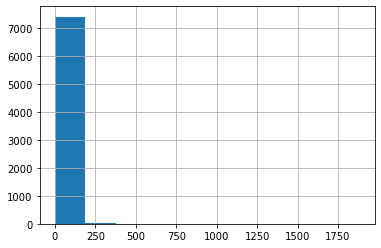

In [59]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count